In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

  Activating project at `D:\Science\Code\Julia\envr`


In [2]:
function TM(u, p, t)

    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    
    # u[1] - E; u[2] - x; u[3] - y
    # α - 1, τ - 2, τD - 3, τy - 4, J - 5, xthr - 6, ythr - 7, U0 - 8, ΔU0 - 9, β - 10, I0 -11

    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SA[du1, du2, du3]
end;

In [3]:
t = 1000.0; tt = 1000.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const U0 = 0.3;  const ΔU0 = 0.305;
const I0 = -1.6;

In [5]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

### Multistability

In [6]:
u0_chaos = SA[3.8398031438626057, 0.8237522227211204, 0.4265960327571268]
ds_chaos = ContinuousDynamicalSystem(TM, u0_chaos, p)

3-dimensional continuous dynamical system
 state:       [3.8398, 0.823752, 0.426596]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [7]:
u0_stable = SA[10.114129259254579, 0.7043935355527935, 0.41019986371663264]
ds_stable = ContinuousDynamicalSystem(TM, u0_stable, p)

3-dimensional continuous dynamical system
 state:       [10.1141, 0.704394, 0.4102]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.58, 0.013, 0.08, 3.3, 3.07, 0.75, 0.4, 0.3, 0.305, 0.3, -1.6]

In [8]:
tr_chaos = trajectory(ds_chaos, t, Δt = tstep; Ttr = tt, diffeq = integ_set)
tr_stable = trajectory(ds_stable, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [9]:
lb_size = 35; tck_size = 30;

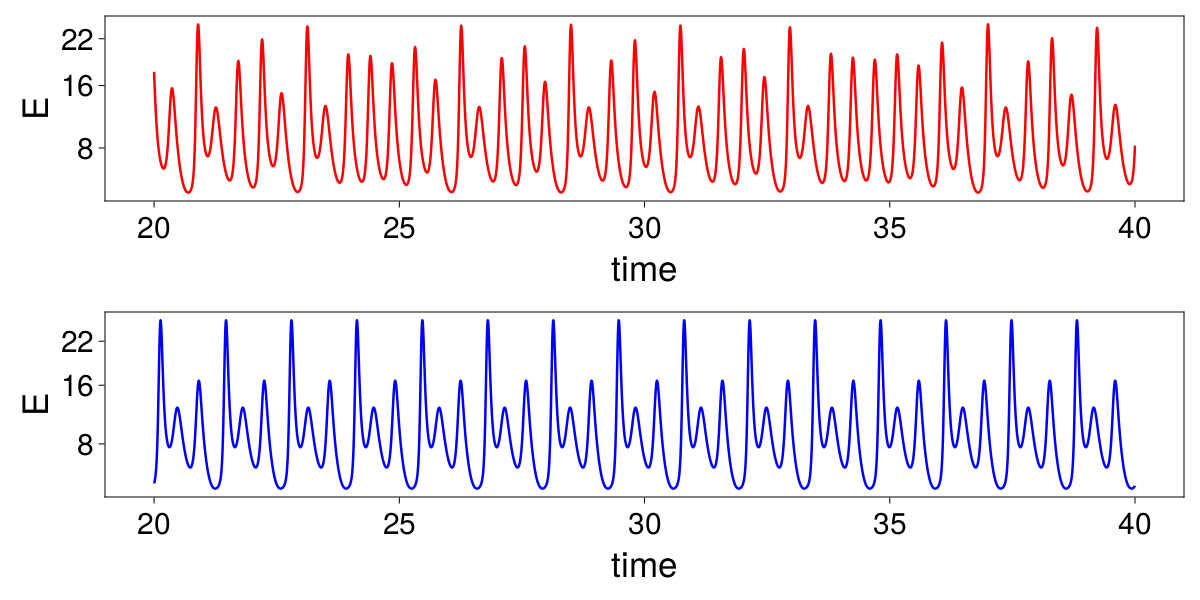

In [14]:
ts, tf = 20000, 40000
f = Figure(resolution = (1200, 600))
axis1 = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])
axis2 = Axis(f[2, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, yticks = [8, 16, 22])

lines!(axis1, trange[ts:tf], tr_chaos[ts:tf, 1],  linewidth = 2.5, linestyle = :solid, color = :red)
lines!(axis2, trange[ts:tf], tr_stable[ts:tf, 1], linewidth = 2.5, linestyle = :solid, color = :blue)
f

In [15]:
save("timeseries_multistab.eps", f)

CairoMakie.Screen{EPS}


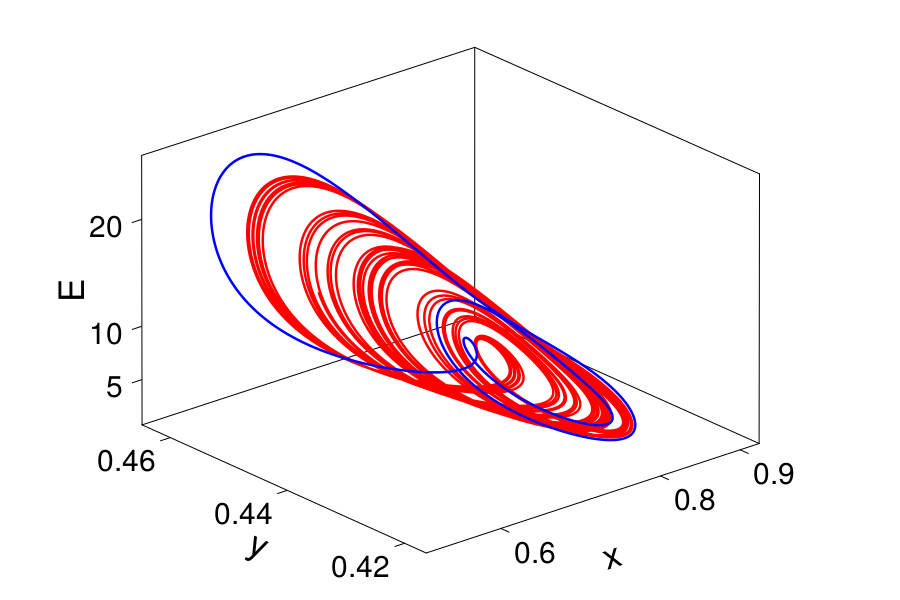

In [11]:
ts, tf = 20000, 40000
idx, idy, idz = 2, 3, 1

f = Figure(resolution = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false,
                xticks = [0.6 ,0.8, 0.9], yticks = [0.42, 0.44, 0.46], zticks = [5, 10, 20])

lines!(axis3, tr_chaos[ts:tf, idx], tr_chaos[ts:tf, idy], tr_chaos[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :red)

lines!(axis3, tr_stable[ts:tf, idx], tr_stable[ts:tf, idy], tr_stable[ts:tf, idz],
        linewidth = 2.5, linestyle = :solid, color = :blue)
f

In [12]:
# save("phase_multistab.eps", f)